# Evaluation

After the model has been trained, the next step is to evaluate the model on the test set that was splitted using the train test split method. This step is necassary in order to find out how the model will perform with unseen data. Let's import some important libraries required for evaluation purpose.

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from tensorflow.keras.models import load_model
import joblib

## ANN

I will be using the training history of experiment 2 with the combined features. Because the accuracy was better than the experiment 1 model. The training history will be converted to dataframe using Pandas so that it can be visualised using a plot.

In [59]:
losses = pd.DataFrame(history_2.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.092055,0.314817,1.687288,0.430208
1,1.496678,0.489334,1.264867,0.577666
2,1.189498,0.598425,1.223194,0.614889
3,1.050005,0.658411,0.913218,0.717967
4,0.881479,0.713243,0.868244,0.704367


As you can see there was not much improvement in the accuracy after epoch 20, that why the training was stopped by the EarlyStopping function at epoch 40. Training the model more could have resulted in the overfitting of the model. 

<AxesSubplot:>

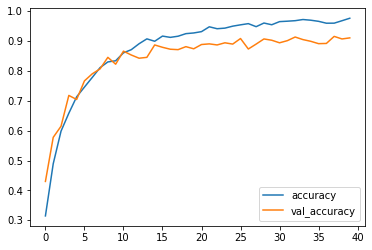

In [60]:
losses[['accuracy','val_accuracy']].plot()

The loss also stopped droping after epoch 20 and there was more deviation between training loss and validation loss.

<AxesSubplot:>

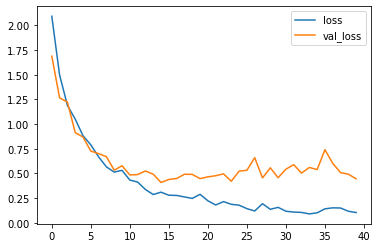

In [61]:
losses[['loss','val_loss']].plot()

Now, the predict method will be used on the test set. Since the labels were one hot encoded with multiple columns, it will be converted using numpy argmax to perform prediction methods such as confusion matrix and classifiation report. 

In [62]:
pred = model.predict(X_test)
# one hot encoded multiclass labels so converting to argmax
arg_pred = np.argmax(pred, axis=1)
arg_true = np.argmax(y_test, axis=1)

The model performs very good as there is very less false positives and false negatives.

In [63]:
print(confusion_matrix(arg_true, arg_pred))

[[183   0   3   0   6   0   0   0   0   1]
 [  0  76   0   1   0   0   0   0   0   1]
 [  1   0 206   0   1   0   0   0   2   1]
 [  1   0   5 188   0   1   0   1   1   1]
 [  0   0   2   0 203   0   0   1   0   1]
 [  0   0   0   0   1 181   0   1   1   1]
 [  0   0   0   0   1   0  77   0   0   1]
 [  0   0   0   0   3   0   0 188   0   0]
 [  0   0   0   2   0   0   0   0 197   0]
 [  3   0   2   0   3   1   1   1   0 195]]


In [65]:
print(classification_report(arg_true, arg_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       193
           1       1.00      0.97      0.99        78
           2       0.94      0.98      0.96       211
           3       0.98      0.95      0.97       198
           4       0.93      0.98      0.96       207
           5       0.99      0.98      0.98       185
           6       0.99      0.97      0.98        79
           7       0.98      0.98      0.98       191
           8       0.98      0.99      0.98       199
           9       0.97      0.95      0.96       206

    accuracy                           0.97      1747
   macro avg       0.97      0.97      0.97      1747
weighted avg       0.97      0.97      0.97      1747



The precision, recall, f1-score, accuracy scores are very good for the model. This shows the power of neural networks on complex data.

## Random Forest

The evaluation for the Random forest model will be done. The numpy argmax conversions will be done for the predictions and true labels.

In [68]:
arg_pred_rf = np.argmax(rf_pred_2, axis=1)
arg_true_rf = np.argmax(y_test, axis=1)

The number of false negatives is high. The model performed poorly in predicting car horn and street music.

In [71]:
confusion_matrix(arg_true_rf, arg_pred_rf)

array([[192,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [ 52,  23,   1,   0,   2,   0,   0,   0,   0,   0],
       [ 90,   0, 109,   4,   3,   1,   1,   0,   1,   2],
       [ 79,   0,   3, 115,   1,   0,   0,   0,   0,   0],
       [ 48,   0,   1,   0, 149,   0,   0,   9,   0,   0],
       [ 22,   0,   2,   0,   0, 161,   0,   0,   0,   0],
       [ 20,   0,   1,   0,   1,   0,  57,   0,   0,   0],
       [ 28,   0,   0,   0,   4,   0,   0, 158,   0,   1],
       [ 51,   0,   0,   1,   0,   0,   0,   0, 146,   1],
       [132,   0,   2,   0,   1,   1,   0,   0,   0,  70]])

In [73]:
print(classification_report(arg_true_rf, arg_pred_rf))

              precision    recall  f1-score   support

           0       0.27      0.99      0.42       193
           1       1.00      0.29      0.46        78
           2       0.92      0.52      0.66       211
           3       0.96      0.58      0.72       198
           4       0.93      0.72      0.81       207
           5       0.99      0.87      0.93       185
           6       0.98      0.72      0.83        79
           7       0.94      0.83      0.88       191
           8       0.99      0.73      0.84       199
           9       0.95      0.34      0.50       206

    accuracy                           0.68      1747
   macro avg       0.89      0.66      0.71      1747
weighted avg       0.88      0.68      0.71      1747



The precision for the class air conditioner is very low. The recall is low for most of the classes. The accuracy is 68% percent which is less compared to ANN. 